# **Face Recognition**

This code contains accuracies of algorithms like lda, svm, LR, DT, NB, KNN, CNN

In [1]:
# Basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

# ignore warnings.
warnings.filterwarnings('ignore')

In [2]:
# import models that we are going to use
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

**Input**

Olivetti Dataset¶
The Olivetti dataset comprises a collection of face images captured over a two-year period, from April 1992 to April 1994. It consists of 400 images in total, with each of the 40 individuals represented by ten distinct images. These face images were captured under varying conditions, including different lighting conditions, facial expressions, and facial details, providing a diverse and comprehensive dataset for facial recognition and analysis. All the face images feature a black background and are presented in grayscale. Each image has a resolution of 64x64 pixels. To facilitate data processing, the pixel values of the images have been scaled to the range of [0, 1]. Additionally, to ensure consistency in data representation, the names of the 40 individuals have been encoded as integers, ranging from 0 to

The Olivetti dataset serves as a valuable resource for researchers and practitioners working in the field of facial recognition, enabling the development and evaluation of algorithms and models in this domain.

**Gaussian Noise¶**

For inputs, we have added Gaussian noise to the Olivetti dataset. The Gaussian noise is generated using the numpy.random.normal function. We used scale of 0.01 in this experiment, while we have also tried to apply noise with gaussian scale of 0.05 in the report.

In [4]:
# load input data(olivetti)
inputPath = "/content/olivetti_faces.npy"
targetPath = "/content/olivetti_faces_target.npy"

data = np.load(inputPath)
target = np.load(targetPath)

In [5]:
def add_gaussian_noise(image, scale):
    noise = np.random.normal(loc=0, scale=scale, size=image.shape)
    noisy_img = np.clip(image + noise, 0, 1)
    return noisy_img

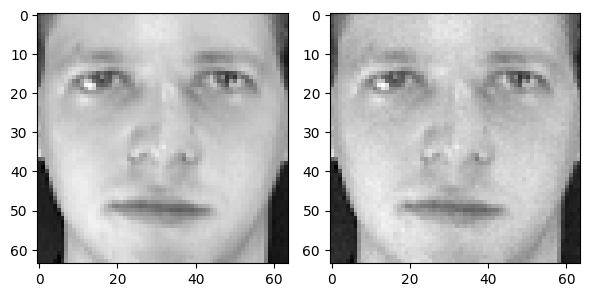

In [6]:
# plot original image and noisy image for sample
image = data[0]
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].imshow(image, cmap="gray")
axs[1].imshow(add_gaussian_noise(image, 0.01), cmap="gray")
plt.tight_layout()
plt.show()

In [7]:
# create noisy data
noisy_data = np.empty((0, 64, 64))

for i in range(len(data)):
    scale = 0.01
    noisy_image = add_gaussian_noise(data[i], scale)
    noisy_data = np.append(noisy_data, [noisy_image], axis=0)

noisy_data.shape

(400, 64, 64)

In [8]:
# reshape images for machine learnig  model
X = data.reshape((data.shape[0], data.shape[1]*data.shape[2]))
X_noisy = noisy_data.reshape(
    (noisy_data.shape[0], noisy_data.shape[1]*noisy_data.shape[2]))

print("Original shape:", data.shape)
print("X shape:", X.shape)
print("X_noisy shape:", X_noisy.shape)

Original shape: (400, 64, 64)
X shape: (400, 4096)
X_noisy shape: (400, 4096)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size=0.3, stratify=target, random_state=47)
X_train_noisy, X_test_noisy, y_noisy_train, y_noisy_test = train_test_split(
    X_noisy, target, test_size=0.3, stratify=target, random_state=47)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train_noisy shape:", X_train_noisy.shape)
print("y_noisy_train shape:", y_noisy_train.shape)

X_train shape: (280, 4096)
y_train shape: (280,)
X_train_noisy shape: (280, 4096)
y_noisy_train shape: (280,)


**Applying PCA**

Principal Component Analysis (PCA) is a widely used dimensionality reduction technique in the field of data analysis and machine learning. Its primary objective is to transform a high-dimensional dataset into a lower-dimensional representation while preserving as much of the original information as possible. PCA achieves this by identifying the principal components, which are linear combinations of the original features that capture the maximum variance in the data. These principal components are orthogonal to each other and are ranked in order of their significance, with the first component explaining the most variance in the dataset. By projecting the data onto a subset of the most informative principal components, PCA allows for a simplified representation of the data while minimizing the loss of relevant information. This reduction in dimensionality not only facilitates data visualization but also improves computational efficiency and helps mitigate the curse of dimensionality.

Moreover, PCA finds applications in various domains, including image processing, genetics, finance, and natural language processing, enabling researchers and practitioners to explore and analyze complex datasets more effectively. Overall, PCA serves as a powerful and versatile tool for dimensionality reduction and data exploration, offering valuable insights and aiding in the interpretation of large and high-dimensional datasets.

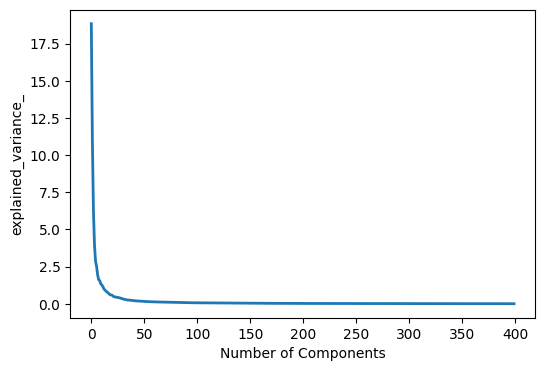

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

plt.figure(1, figsize=(6, 4))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('explained_variance_')
plt.show()

In [11]:
n_components = 90

pca = PCA(n_components=n_components, whiten=True)
noisy_pca = PCA(n_components=n_components, whiten=True)

pca.fit(X_train)
noisy_pca.fit(X_train_noisy)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

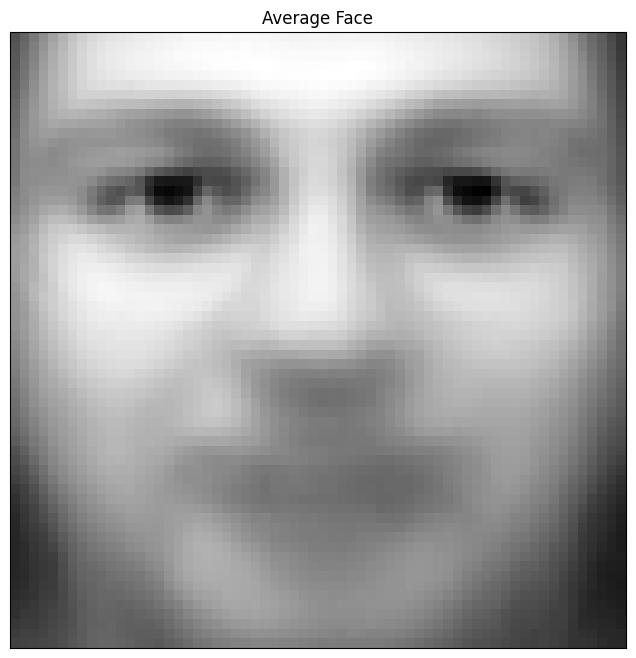

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(noisy_pca.mean_.reshape((64, 64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

**EigenFaces**

Eigen faces are generated by applying Principal Component Analysis (PCA) to a collection of face images. These eigen faces represent the principal components or features extracted from the dataset. While eigen faces themselves are essentially vector-based images, they offer valuable insights into the underlying patterns and variations in the data. Although eigen faces are not inherently special, they can exhibit certain recognizable features that resemble common attributes such as glasses or prominent eyebrows. These seemingly "explainable" features can arise from the fact that the eigen faces capture the most significant variations in the face images, including variations related to specific facial characteristics. Consequently, eigen faces provide a visual representation of the dominant facial attributes present in the dataset, even if they are not explicitly labeled or categorized. Despite their simplicity as vector images, eigen faces serve as a useful tool for understanding and exploring the underlying structure of face data, helping researchers and practitioners gain insights into the diverse facial features and patterns present in a given dataset.

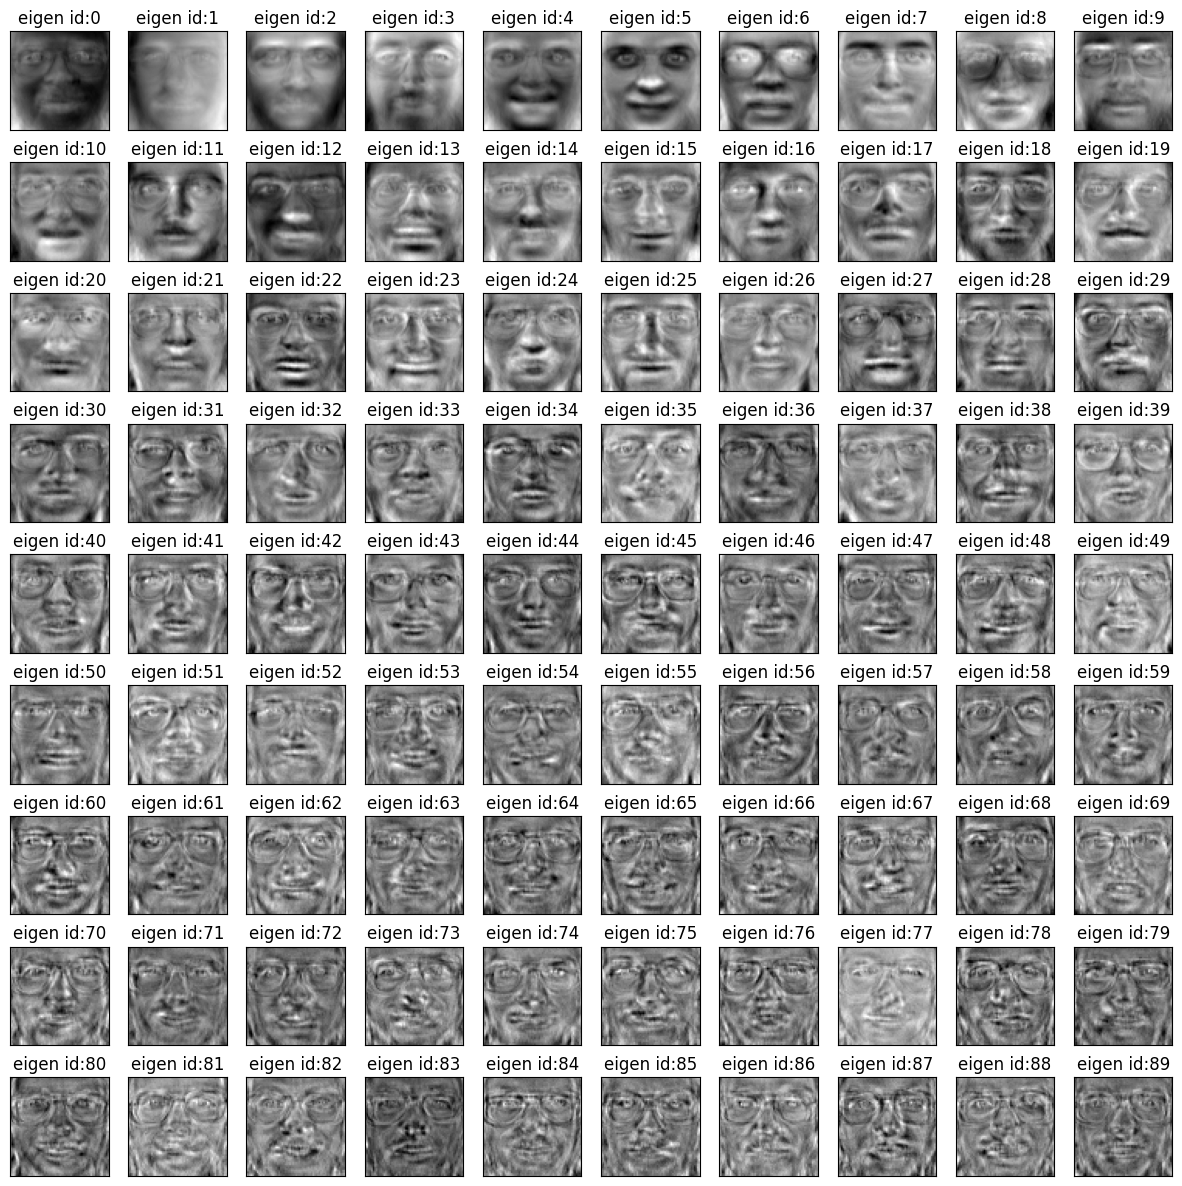

In [13]:
number_of_eigenfaces = len(pca.components_)
eigen_faces = noisy_pca.components_.reshape(
    (number_of_eigenfaces, data.shape[1], data.shape[2]))

cols = 10
rows = int(number_of_eigenfaces/cols)
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
axarr = axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i], cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
# plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [14]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_noisy_pca = noisy_pca.transform(X_train_noisy)
X_test_noisy_pca = noisy_pca.transform(X_test_noisy)

## **Testing**

In [15]:
models = []
models.append(('SVM', SVC()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR", LogisticRegression()))
models.append(("NB", GaussianNB()))
models.append(("KNN", KNeighborsClassifier(n_neighbors=5)))
models.append(("DT", DecisionTreeClassifier()))

noisy_models = []
noisy_models.append(("Noisy_SVM", SVC()))
noisy_models.append(('Noisy_LDA', LinearDiscriminantAnalysis()))
noisy_models.append(("Noisy_LR", LogisticRegression()))
noisy_models.append(("Noisy_NB", GaussianNB()))
noisy_models.append(("Noisy_KNN", KNeighborsClassifier(n_neighbors=5)))
noisy_models.append(("Noisy_DT", DecisionTreeClassifier()))


for i in range(len(models)):
    name, model = models[i]
    noisy_name, noisy_model = noisy_models[i]

    clf = model
    noisy_clf = noisy_model

    clf.fit(X_train_pca, y_train)
    noisy_clf.fit(X_train_noisy, y_noisy_train)

    y_pred = clf.predict(X_test_pca)
    y_noisy_pred = clf.predict(X_test_noisy_pca)

    print(10*"=", "{} Result".format(name).upper(), 10*"=")
    print("Accuracy score[normal]:{:0.2f}".format(
        metrics.accuracy_score(y_test, y_pred)))
    print("Accuracy score[noisy ]:{:0.2f}".format(
        metrics.accuracy_score(y_test, y_noisy_pred)))
    print()

========== SVM RESULT ==========
Accuracy score[normal]:0.96
Accuracy score[noisy ]:0.88

========== LDA RESULT ==========
Accuracy score[normal]:0.97
Accuracy score[noisy ]:0.94

========== LR RESULT ==========
Accuracy score[normal]:0.94
Accuracy score[noisy ]:0.90

========== NB RESULT ==========
Accuracy score[normal]:0.88
Accuracy score[noisy ]:0.78

========== KNN RESULT ==========
Accuracy score[normal]:0.72
Accuracy score[noisy ]:0.57

========== DT RESULT ==========
Accuracy score[normal]:0.51
Accuracy score[noisy ]:0.50



### **Testing on CNN**

In [16]:
# Reshaping
X_train_cnn = X_train.reshape(-1,64,64,1)
X_test_cnn = X_test.reshape(-1,64,64,1)
X_train_noisy_cnn = X_train_noisy.reshape(-1,64,64,1)
X_test_noisy_cnn = X_test_noisy.reshape(-1,64,64,1)

print("X_train_cnn: ",X_train_cnn.shape)
print("X_test_cnn: ",X_test_cnn.shape)
print("X_train_noisy_cnn: ",X_train_noisy_cnn.shape)
print("X_test_noisy_cnn: ",X_test_noisy_cnn.shape)

X_train_cnn:  (280, 64, 64, 1)
X_test_cnn:  (120, 64, 64, 1)
X_train_noisy_cnn:  (280, 64, 64, 1)
X_test_noisy_cnn:  (120, 64, 64, 1)


In [17]:
from keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, num_classes = 40)
y_test_categorical = to_categorical(y_test, num_classes = 40)

print("y_train_ shape: ",y_train_categorical.shape)
print("y_test_ shape: ",y_test_categorical.shape)

y_train_ shape:  (280, 40)
y_test_ shape:  (120, 40)


In [18]:
from keras.models import Sequential, clone_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

# This structure followed the same structure from Hakan Ozen's work on CNN
# https://www.kaggle.com/code/hakanozen/face-recognition-by-lr-rforest-knn-and-cnn

model.add(Conv2D(filters = 20, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (64,64,1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 50, kernel_size = (6,6),padding = 'Same',
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 150, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (64,64,1)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(40, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)
optimizer_noisy = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.7,
                                            min_lr=0.00000000001)

epoch = 37
batch_size = 20

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.05, # Randomly zoom image
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train_cnn)

datagen_noisy = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.05, # Randomly zoom image
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen_noisy.fit(X_train_noisy_cnn)


# Clone the model for noisy
model_noisy = clone_model(model)
model_noisy.compile(optimizer = optimizer_noisy , loss = "categorical_crossentropy", metrics=["accuracy"])

history = model.fit_generator(
                              datagen.flow(X_train_cnn,y_train_categorical, batch_size=batch_size),
                              epochs = epoch,
                              validation_data = (X_test_cnn,y_test_categorical),
                              verbose = 2,
                              steps_per_epoch=X_train_cnn.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction]
                             )
history_noisy = model_noisy.fit_generator(
                              datagen_noisy.flow(X_train_noisy_cnn,y_train_categorical, batch_size=batch_size),
                              epochs = epoch,
                              validation_data = (X_test_noisy_cnn,y_test_categorical),
                              verbose = 2,
                              steps_per_epoch=X_train_noisy_cnn.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction]
                             )

Epoch 1/37


14/14 - 9s - loss: 4.1220 - accuracy: 0.0214 - val_loss: 3.6889 - val_accuracy: 0.0250 - lr: 0.0010 - 9s/epoch - 638ms/step
Epoch 2/37


14/14 - 7s - loss: 3.6923 - accuracy: 0.0107 - val_loss: 3.6887 - val_accuracy: 0.0250 - lr: 0.0010 - 7s/epoch - 518ms/step
Epoch 3/37


14/14 - 6s - loss: 3.6909 - accuracy: 0.0214 - val_loss: 3.6885 - val_accuracy: 0.0250 - lr: 0.0010 - 6s/epoch - 423ms/step
Epoch 4/37


14/14 - 7s - loss: 3.6907 - accuracy: 0.0071 - val_loss: 3.6882 - val_accuracy: 0.0250 - lr: 0.0010 - 7s/epoch - 533ms/step
Epoch 5/37


14/14 - 8s - loss: 3.6945 - accuracy: 0.0357 - val_loss: 3.7160 - val_accuracy: 0.0250 - lr: 0.0010 - 8s/epoch - 557ms/step
Epoch 6/37


14/14 - 8s - loss: 3.7165 - accuracy: 0.0286 - val_loss: 3.6881 - val_accuracy: 0.0250 - lr: 0.0010 - 8s/epoch - 540ms/step
Epoch 7/37


14/14 - 6s - loss: 3.6924 - accuracy: 0.0286 - val_loss: 3.6819 - val_accuracy: 0.0417 - lr: 0.0010 - 6s/epoch - 462ms/step
Epoch 8/37


14/14 - 8s - loss: 3.6869 - accuracy: 0.0321 - val_loss: 3.6857 - val_accuracy: 0.0250 - lr: 0.0010 - 8s/epoch - 605ms/step
Epoch 9/37


14/14 - 6s - loss: 3.6959 - accuracy: 0.0321 - val_loss: 3.6573 - val_accuracy: 0.0750 - lr: 0.0010 - 6s/epoch - 459ms/step
Epoch 10/37


14/14 - 7s - loss: 3.6026 - accuracy: 0.0714 - val_loss: 3.4479 - val_accuracy: 0.2833 - lr: 0.0010 - 7s/epoch - 466ms/step
Epoch 11/37


14/14 - 7s - loss: 3.2346 - accuracy: 0.1321 - val_loss: 2.7289 - val_accuracy: 0.3750 - lr: 0.0010 - 7s/epoch - 470ms/step
Epoch 12/37


14/14 - 8s - loss: 2.7006 - accuracy: 0.2357 - val_loss: 2.0601 - val_accuracy: 0.6167 - lr: 0.0010 - 8s/epoch - 579ms/step
Epoch 13/37


14/14 - 6s - loss: 1.9590 - accuracy: 0.4179 - val_loss: 1.4948 - val_accuracy: 0.6667 - lr: 0.0010 - 6s/epoch - 424ms/step
Epoch 14/37


14/14 - 7s - loss: 1.6747 - accuracy: 0.5036 - val_loss: 1.1102 - val_accuracy: 0.7750 - lr: 0.0010 - 7s/epoch - 522ms/step
Epoch 15/37


14/14 - 7s - loss: 1.2600 - accuracy: 0.6214 - val_loss: 0.8720 - val_accuracy: 0.8167 - lr: 0.0010 - 7s/epoch - 484ms/step
Epoch 16/37


14/14 - 8s - loss: 1.0463 - accuracy: 0.6786 - val_loss: 0.8533 - val_accuracy: 0.8167 - lr: 0.0010 - 8s/epoch - 578ms/step
Epoch 17/37


14/14 - 7s - loss: 0.8589 - accuracy: 0.7536 - val_loss: 0.7270 - val_accuracy: 0.7750 - lr: 0.0010 - 7s/epoch - 481ms/step
Epoch 18/37


14/14 - 6s - loss: 0.7710 - accuracy: 0.7786 - val_loss: 0.5730 - val_accuracy: 0.8417 - lr: 0.0010 - 6s/epoch - 458ms/step
Epoch 19/37


14/14 - 7s - loss: 0.6483 - accuracy: 0.7929 - val_loss: 0.4527 - val_accuracy: 0.8667 - lr: 0.0010 - 7s/epoch - 533ms/step
Epoch 20/37


14/14 - 8s - loss: 0.5876 - accuracy: 0.8250 - val_loss: 0.4846 - val_accuracy: 0.8917 - lr: 0.0010 - 8s/epoch - 539ms/step
Epoch 21/37


14/14 - 6s - loss: 0.4078 - accuracy: 0.8786 - val_loss: 0.4453 - val_accuracy: 0.8917 - lr: 0.0010 - 6s/epoch - 425ms/step
Epoch 22/37


14/14 - 9s - loss: 0.3857 - accuracy: 0.8607 - val_loss: 0.4406 - val_accuracy: 0.8667 - lr: 0.0010 - 9s/epoch - 667ms/step
Epoch 23/37


14/14 - 9s - loss: 0.3789 - accuracy: 0.8714 - val_loss: 0.3434 - val_accuracy: 0.9000 - lr: 0.0010 - 9s/epoch - 671ms/step
Epoch 24/37


14/14 - 6s - loss: 0.3187 - accuracy: 0.9071 - val_loss: 0.4040 - val_accuracy: 0.8917 - lr: 0.0010 - 6s/epoch - 427ms/step
Epoch 25/37


14/14 - 8s - loss: 0.3662 - accuracy: 0.8893 - val_loss: 0.4279 - val_accuracy: 0.9000 - lr: 0.0010 - 8s/epoch - 562ms/step
Epoch 26/37


14/14 - 6s - loss: 0.2898 - accuracy: 0.9143 - val_loss: 0.4481 - val_accuracy: 0.8833 - lr: 0.0010 - 6s/epoch - 424ms/step
Epoch 27/37


14/14 - 7s - loss: 0.2105 - accuracy: 0.9214 - val_loss: 0.3372 - val_accuracy: 0.9250 - lr: 0.0010 - 7s/epoch - 475ms/step
Epoch 28/37


14/14 - 7s - loss: 0.2834 - accuracy: 0.9107 - val_loss: 0.3720 - val_accuracy: 0.9167 - lr: 0.0010 - 7s/epoch - 533ms/step
Epoch 29/37


14/14 - 7s - loss: 0.1961 - accuracy: 0.9393 - val_loss: 0.3373 - val_accuracy: 0.9083 - lr: 0.0010 - 7s/epoch - 486ms/step
Epoch 30/37


14/14 - 7s - loss: 0.2094 - accuracy: 0.9179 - val_loss: 0.3463 - val_accuracy: 0.9167 - lr: 0.0010 - 7s/epoch - 529ms/step
Epoch 31/37


14/14 - 6s - loss: 0.1447 - accuracy: 0.9429 - val_loss: 0.3959 - val_accuracy: 0.8917 - lr: 0.0010 - 6s/epoch - 427ms/step
Epoch 32/37


14/14 - 8s - loss: 0.2219 - accuracy: 0.9357 - val_loss: 0.3032 - val_accuracy: 0.9250 - lr: 0.0010 - 8s/epoch - 545ms/step
Epoch 33/37


14/14 - 6s - loss: 0.2727 - accuracy: 0.9143 - val_loss: 0.2908 - val_accuracy: 0.9333 - lr: 0.0010 - 6s/epoch - 415ms/step
Epoch 34/37


14/14 - 8s - loss: 0.1790 - accuracy: 0.9571 - val_loss: 0.2160 - val_accuracy: 0.9250 - lr: 0.0010 - 8s/epoch - 538ms/step
Epoch 35/37


14/14 - 6s - loss: 0.1435 - accuracy: 0.9643 - val_loss: 0.2515 - val_accuracy: 0.9333 - lr: 0.0010 - 6s/epoch - 460ms/step
Epoch 36/37


14/14 - 6s - loss: 0.1042 - accuracy: 0.9571 - val_loss: 0.3445 - val_accuracy: 0.8917 - lr: 0.0010 - 6s/epoch - 423ms/step
Epoch 37/37


14/14 - 8s - loss: 0.1645 - accuracy: 0.9536 - val_loss: 0.2427 - val_accuracy: 0.9167 - lr: 0.0010 - 8s/epoch - 548ms/step
Epoch 1/37


14/14 - 7s - loss: 6.7786 - accuracy: 0.0214 - val_loss: 3.6873 - val_accuracy: 0.0250 - lr: 0.0010 - 7s/epoch - 486ms/step
Epoch 2/37


14/14 - 6s - loss: 3.6940 - accuracy: 0.0321 - val_loss: 3.6873 - val_accuracy: 0.0250 - lr: 0.0010 - 6s/epoch - 432ms/step
Epoch 3/37


14/14 - 8s - loss: 3.6896 - accuracy: 0.0286 - val_loss: 3.6857 - val_accuracy: 0.0500 - lr: 0.0010 - 8s/epoch - 546ms/step
Epoch 4/37


14/14 - 6s - loss: 3.6868 - accuracy: 0.0321 - val_loss: 3.6829 - val_accuracy: 0.0583 - lr: 0.0010 - 6s/epoch - 429ms/step
Epoch 5/37


14/14 - 7s - loss: 3.6802 - accuracy: 0.0286 - val_loss: 3.6790 - val_accuracy: 0.0667 - lr: 0.0010 - 7s/epoch - 526ms/step
Epoch 6/37


14/14 - 7s - loss: 3.7826 - accuracy: 0.0500 - val_loss: 3.6737 - val_accuracy: 0.1250 - lr: 0.0010 - 7s/epoch - 480ms/step
Epoch 7/37


14/14 - 6s - loss: 3.6600 - accuracy: 0.0500 - val_loss: 3.6030 - val_accuracy: 0.0917 - lr: 0.0010 - 6s/epoch - 415ms/step
Epoch 8/37


14/14 - 6s - loss: 3.5782 - accuracy: 0.0643 - val_loss: 3.5624 - val_accuracy: 0.1500 - lr: 0.0010 - 6s/epoch - 417ms/step
Epoch 9/37


14/14 - 8s - loss: 3.3819 - accuracy: 0.1107 - val_loss: 3.1546 - val_accuracy: 0.2167 - lr: 0.0010 - 8s/epoch - 537ms/step
Epoch 10/37


14/14 - 6s - loss: 2.9811 - accuracy: 0.2214 - val_loss: 2.4226 - val_accuracy: 0.4917 - lr: 0.0010 - 6s/epoch - 421ms/step
Epoch 11/37


14/14 - 7s - loss: 2.4727 - accuracy: 0.3321 - val_loss: 1.9051 - val_accuracy: 0.5417 - lr: 0.0010 - 7s/epoch - 535ms/step
Epoch 12/37


14/14 - 7s - loss: 1.8899 - accuracy: 0.4714 - val_loss: 1.4016 - val_accuracy: 0.6417 - lr: 0.0010 - 7s/epoch - 513ms/step
Epoch 13/37


14/14 - 6s - loss: 1.4760 - accuracy: 0.5571 - val_loss: 1.0694 - val_accuracy: 0.7833 - lr: 0.0010 - 6s/epoch - 411ms/step
Epoch 14/37


14/14 - 7s - loss: 1.2607 - accuracy: 0.6607 - val_loss: 0.8115 - val_accuracy: 0.7833 - lr: 0.0010 - 7s/epoch - 522ms/step
Epoch 15/37


14/14 - 6s - loss: 1.0063 - accuracy: 0.7036 - val_loss: 0.6946 - val_accuracy: 0.8583 - lr: 0.0010 - 6s/epoch - 425ms/step
Epoch 16/37


14/14 - 7s - loss: 0.8864 - accuracy: 0.7321 - val_loss: 0.4283 - val_accuracy: 0.9000 - lr: 0.0010 - 7s/epoch - 519ms/step
Epoch 17/37


14/14 - 6s - loss: 0.6499 - accuracy: 0.8036 - val_loss: 0.5515 - val_accuracy: 0.8750 - lr: 0.0010 - 6s/epoch - 442ms/step
Epoch 18/37


14/14 - 8s - loss: 0.5235 - accuracy: 0.8214 - val_loss: 0.5529 - val_accuracy: 0.8250 - lr: 0.0010 - 8s/epoch - 544ms/step
Epoch 19/37


14/14 - 6s - loss: 0.4223 - accuracy: 0.8857 - val_loss: 0.5348 - val_accuracy: 0.8750 - lr: 0.0010 - 6s/epoch - 425ms/step
Epoch 20/37


14/14 - 6s - loss: 0.4422 - accuracy: 0.8679 - val_loss: 0.2821 - val_accuracy: 0.9250 - lr: 0.0010 - 6s/epoch - 420ms/step
Epoch 21/37


14/14 - 7s - loss: 0.3876 - accuracy: 0.8786 - val_loss: 0.2895 - val_accuracy: 0.9250 - lr: 0.0010 - 7s/epoch - 529ms/step
Epoch 22/37


14/14 - 6s - loss: 0.3654 - accuracy: 0.8821 - val_loss: 0.2813 - val_accuracy: 0.9083 - lr: 0.0010 - 6s/epoch - 422ms/step
Epoch 23/37


14/14 - 8s - loss: 0.3626 - accuracy: 0.9107 - val_loss: 0.3971 - val_accuracy: 0.8667 - lr: 0.0010 - 8s/epoch - 541ms/step
Epoch 24/37


14/14 - 6s - loss: 0.2333 - accuracy: 0.9286 - val_loss: 0.2573 - val_accuracy: 0.9333 - lr: 0.0010 - 6s/epoch - 419ms/step
Epoch 25/37


14/14 - 7s - loss: 0.1490 - accuracy: 0.9500 - val_loss: 0.2804 - val_accuracy: 0.9333 - lr: 0.0010 - 7s/epoch - 524ms/step
Epoch 26/37


14/14 - 6s - loss: 0.2815 - accuracy: 0.9000 - val_loss: 0.2767 - val_accuracy: 0.9083 - lr: 0.0010 - 6s/epoch - 420ms/step
Epoch 27/37


14/14 - 7s - loss: 0.1686 - accuracy: 0.9536 - val_loss: 0.4498 - val_accuracy: 0.8750 - lr: 0.0010 - 7s/epoch - 514ms/step
Epoch 28/37


14/14 - 7s - loss: 0.2566 - accuracy: 0.9179 - val_loss: 0.2507 - val_accuracy: 0.9250 - lr: 0.0010 - 7s/epoch - 517ms/step
Epoch 29/37


14/14 - 6s - loss: 0.1514 - accuracy: 0.9536 - val_loss: 0.2609 - val_accuracy: 0.9333 - lr: 0.0010 - 6s/epoch - 412ms/step
Epoch 30/37


14/14 - 8s - loss: 0.2187 - accuracy: 0.9357 - val_loss: 0.2242 - val_accuracy: 0.9250 - lr: 0.0010 - 8s/epoch - 541ms/step
Epoch 31/37


14/14 - 6s - loss: 0.2166 - accuracy: 0.9393 - val_loss: 0.2478 - val_accuracy: 0.9167 - lr: 0.0010 - 6s/epoch - 428ms/step
Epoch 32/37


14/14 - 6s - loss: 0.1338 - accuracy: 0.9607 - val_loss: 0.2721 - val_accuracy: 0.9250 - lr: 0.0010 - 6s/epoch - 424ms/step
Epoch 33/37


14/14 - 7s - loss: 0.1058 - accuracy: 0.9607 - val_loss: 0.2619 - val_accuracy: 0.9167 - lr: 0.0010 - 7s/epoch - 523ms/step
Epoch 34/37


14/14 - 6s - loss: 0.0983 - accuracy: 0.9571 - val_loss: 0.2905 - val_accuracy: 0.9250 - lr: 0.0010 - 6s/epoch - 422ms/step
Epoch 35/37


14/14 - 7s - loss: 0.1155 - accuracy: 0.9500 - val_loss: 0.2956 - val_accuracy: 0.9250 - lr: 0.0010 - 7s/epoch - 522ms/step
Epoch 36/37


14/14 - 6s - loss: 0.1299 - accuracy: 0.9536 - val_loss: 0.2339 - val_accuracy: 0.9333 - lr: 0.0010 - 6s/epoch - 418ms/step
Epoch 37/37


14/14 - 6s - loss: 0.1149 - accuracy: 0.9607 - val_loss: 0.1904 - val_accuracy: 0.9250 - lr: 0.0010 - 6s/epoch - 413ms/step


In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


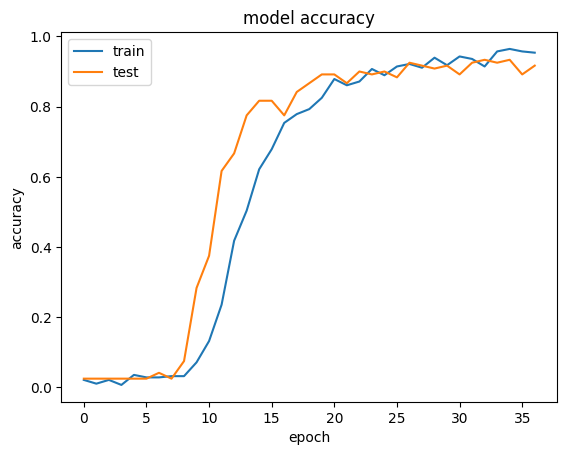

In [23]:
# prompt: give accuracy plot

import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



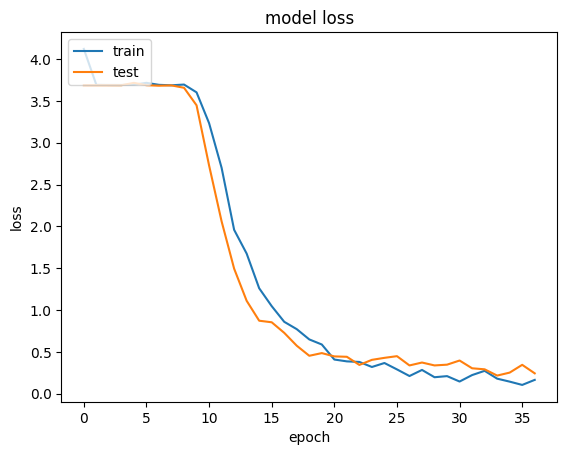

In [24]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



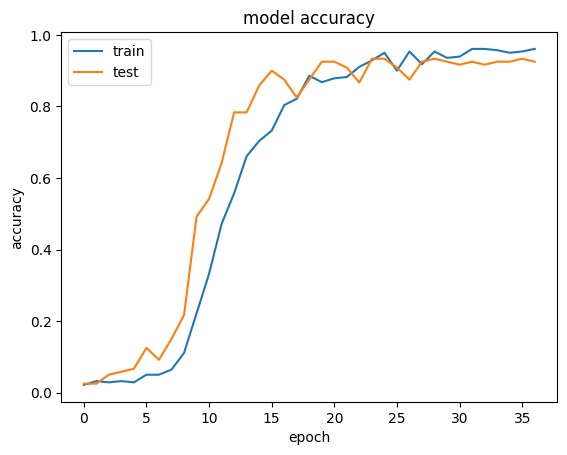

In [25]:
# summarize history for accuracy
plt.plot(history_noisy.history['accuracy'])
plt.plot(history_noisy.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




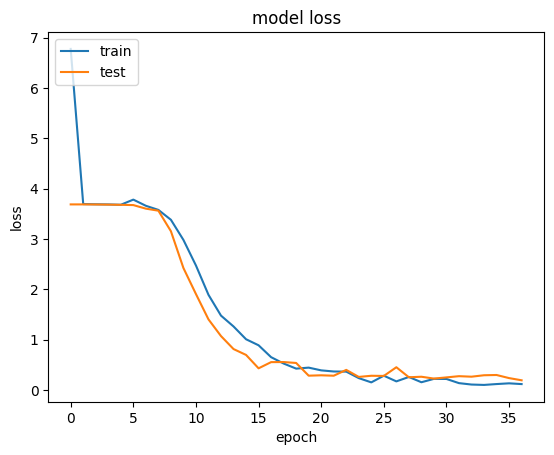

In [26]:
# summarize history for loss
plt.plot(history_noisy.history['loss'])
plt.plot(history_noisy.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()